<a href="https://colab.research.google.com/github/Sharmilaa2004/VOIS_AICTE_Oct2025_MajorProject_Sharmilaa_V/blob/main/Netflix_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**user_message:**

I have uploaded the following files for you to use: Netflix Dataset.csv

I uploaded the file: `Netflix Dataset.csv`

How many movies vs tv shows are on netflix

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

/tmp/ipython-input-129457242.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


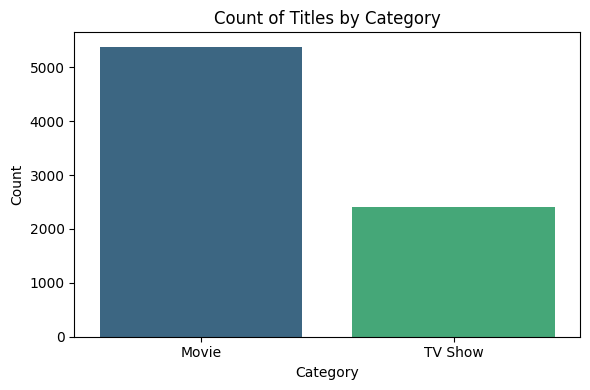

In [1]:
# Load the Netflix dataset and compute counts of Movies vs TV Shows, then visualize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV with provided encoding
netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Basic clean: ensure Category column exists and normalize case/whitespace
netflix_df['Category'] = netflix_df['Category'].astype(str).str.strip()

# Compute counts
type_counts = netflix_df['Category'].value_counts(dropna=False)

# Print head and counts
print(netflix_df.head())
print(type_counts)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Count of Titles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**ai_message:**

## Netflix titles: Movies vs TV Shows

Here’s a peek at the dataset we used:
{outputs_dict['1c9db2b8']}

And here are the counts by category:
{outputs_dict['ace78aff']}

{image_urls_dict['e2750edd']}

**Summary:** Based on this dataset, there are more Movies than TV Shows on Netflix.

**user_message:**

Trend over the years

   Release_Year Category  Count
0        2008.0    Movie      1
1        2008.0  TV Show      1
2        2009.0    Movie      2
3        2010.0    Movie      1
4        2011.0    Movie     13


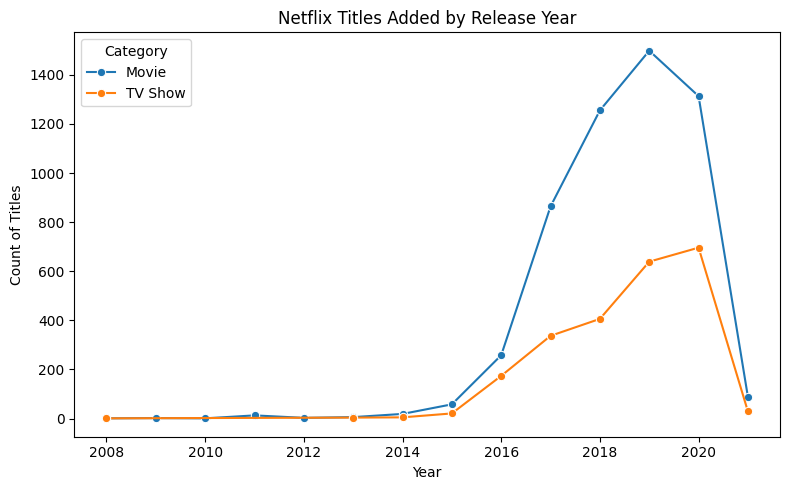

In [2]:
# Parse release year and plot trend over years for Movies vs TV Shows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume netflix_df is already in memory from previous step; if not, load it
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Extract year from Release_Date column
netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

# Drop rows without a valid year
df_year = netflix_df.dropna(subset=['Release_Year']).copy()

# Group by year and category
yearly = df_year.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')

# Show head
print(yearly.head())

# Plot trend
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly, x='Release_Year', y='Count', hue='Category', marker='o')
plt.title('Netflix Titles Added by Release Year')
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.tight_layout()
plt.show()


**ai_message:**

## Trend over the years

Here’s the yearly breakdown of how many titles were released, split by category:
{outputs_dict['0d49b11a']}

And here’s the trend chart:
{image_urls_dict['cf79fff8']}

**Quick take:** Both Movies and TV Shows rise over time, with Movies consistently higher in count than TV Shows in most years.

**user_message:**

most common genres available in netflix

                    Genre  Count
0    International Movies   2437
1                  Dramas   2108
2                Comedies   1472
3  International TV Shows   1199
4           Documentaries    786


/tmp/ipython-input-3769256511.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df.head(top_n), x='Count', y='Genre', palette='mako')


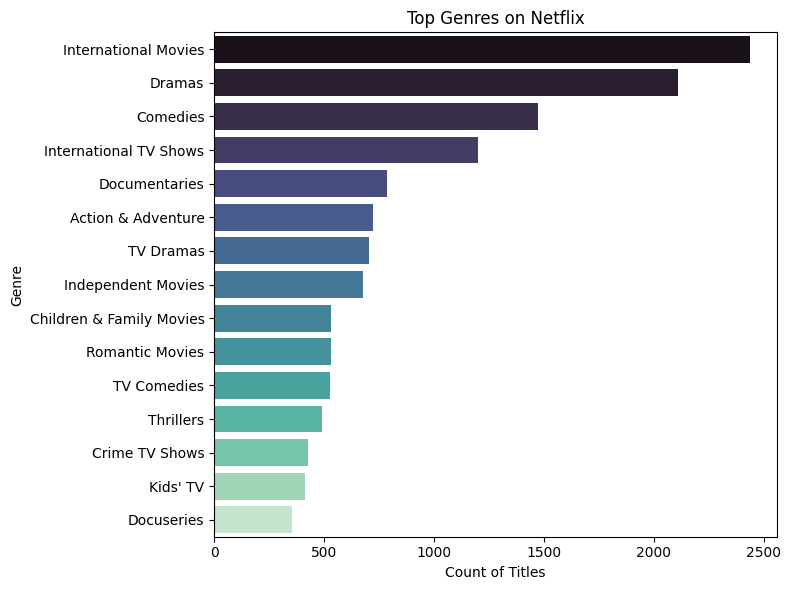

In [3]:
# Compute the most common genres from the Netflix dataset and visualize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dataframe is in memory; otherwise load
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# The 'Type' column appears to contain comma-separated genres/categories.
# Split, explode, and count
genres_series = netflix_df['Type'].astype(str).str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Prepare a tidy dataframe for head display
genres_df = genres_series.reset_index()
genres_df.columns = ['Genre', 'Count']

# Show head
print(genres_df.head())

# Plot top 15 genres
top_n = 15
plt.figure(figsize=(8,6))
sns.barplot(data=genres_df.head(top_n), x='Count', y='Genre', palette='mako')
plt.title('Top Genres on Netflix')
plt.xlabel('Count of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


**ai_message:**

## Most common genres on Netflix

Here are the top genres we extracted from the dataset (we split the Type column by commas and counted each genre across titles):
{outputs_dict['dabe36f9']}

And here’s a quick visual of the top genres:
{image_urls_dict['84fdcab9']}

In short, international content and broad categories like dramas and comedies dominate the catalog.

**user_message:**

genre popularity trends over the years

   Release_Year                         Genre  Count
0        2008.0                        Dramas      1
1        2008.0            Independent Movies      1
2        2008.0  Stand-Up Comedy & Talk Shows      1
3        2008.0                     Thrillers      1
4        2009.0                        Dramas      1


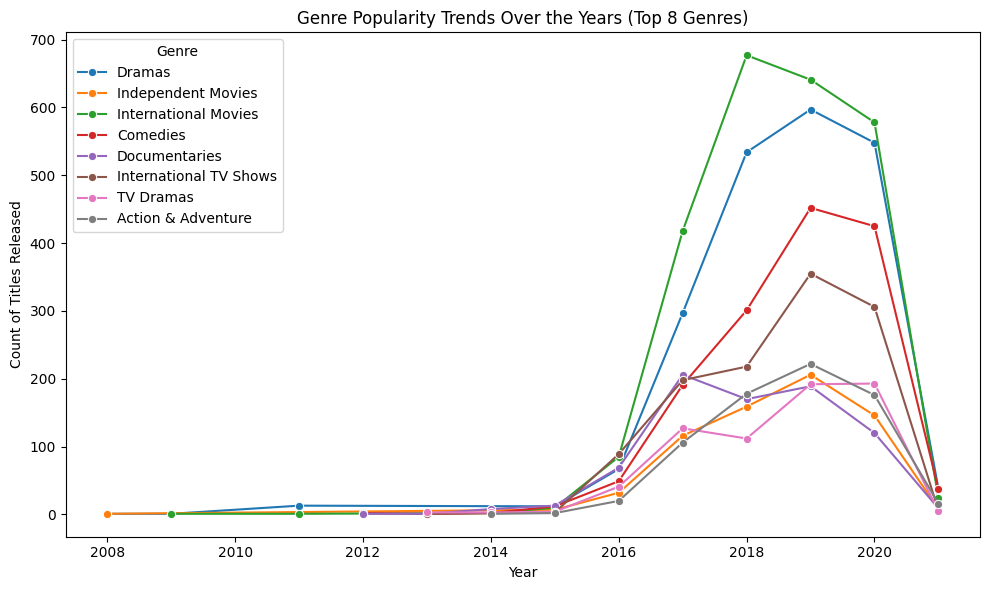

In [4]:
# Trend of genre popularity over years: explode the Type column to genres and count per year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dataframe is present
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Parse release year
netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

# Prepare genres by splitting Type column
df = netflix_df.dropna(subset=['Release_Year']).copy()
df['Type'] = df['Type'].astype(str)

# Explode genres
genres_exploded = df.assign(Genre=df['Type'].str.split(', ')).explode('Genre')

# Group by year and genre
genre_year = genres_exploded.groupby(['Release_Year', 'Genre']).size().reset_index(name='Count')

# Show head of the long-form table
print(genre_year.head())

# Plot top 8 genres over time by total volume
top_genres = genre_year.groupby('Genre')['Count'].sum().sort_values(ascending=False).head(8).index
plot_df = genre_year[genre_year['Genre'].isin(top_genres)].sort_values('Release_Year')

plt.figure(figsize=(10,6))
sns.lineplot(data=plot_df, x='Release_Year', y='Count', hue='Genre', marker='o')
plt.title('Genre Popularity Trends Over the Years (Top 8 Genres)')
plt.xlabel('Year')
plt.ylabel('Count of Titles Released')
plt.tight_layout()
plt.show()


**ai_message:**

## Genre popularity trends over the years

Here’s the long-form table showing yearly counts per genre (sampled from the top):
{outputs_dict['b73a3dd3']}

And here’s the trend chart for the top 8 genres over time:
{image_urls_dict['85468db1']}

**Takeaway:** International content and broad genres like Dramas and Comedies lead overall and grow over time, with noticeable upticks in recent years.

**user_message:**

compare contribution patterns across countries

          Country  Count
0   United States   3297
1           India    990
2  United Kingdom    722
3          Canada    412
4          France    349


/tmp/ipython-input-3231367675.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Count', y='Country', palette='crest')


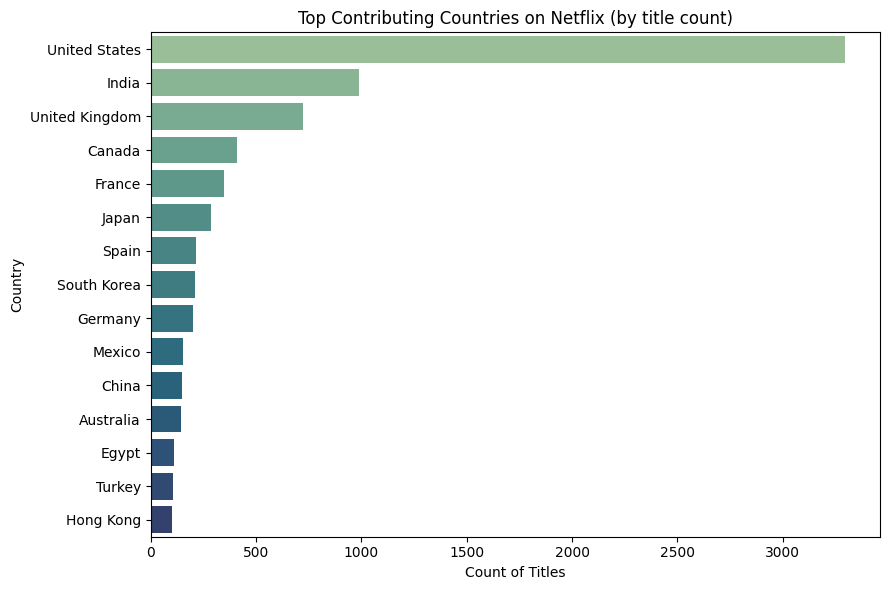

In [5]:
# Compare contribution patterns across countries: count titles by country and category over time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df loaded
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Parse year and clean Country field (may be multiple countries per title)
netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

# Split countries and explode
country_df = netflix_df.copy()
country_df['Country'] = country_df['Country'].astype(str).str.split(', ')
country_df = country_df.explode('Country')
country_df['Country'] = country_df['Country'].str.strip()
country_df = country_df[country_df['Country'].notna() & (country_df['Country'] != 'nan') & (country_df['Country'] != '')]

# Aggregate overall contributions
country_counts = country_df.groupby('Country').size().sort_values(ascending=False).reset_index(name='Count')

print(country_counts.head())

# Plot top 15 contributing countries overall
top_countries = country_counts.head(15)
plt.figure(figsize=(9,6))
sns.barplot(data=top_countries, x='Count', y='Country', palette='crest')
plt.title('Top Contributing Countries on Netflix (by title count)')
plt.xlabel('Count of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**ai_message:**

## Country contribution patterns

Here are the top contributing countries by total title count:
{outputs_dict['27488a50']}

And here’s a quick visual of the leaders:
{image_urls_dict['3db1a0f2']}

In short, the United States dominates overall contributions, followed by India and the United Kingdom, with a long tail of other countries. If you want, I can break this down further by:
- Movies vs TV Shows per country
- Trends over time by country
- Normalizing by year to compare growth trajectories across top markets

**user_message:**

How content trends evolved over the years

**ai_message:**

## How Netflix content trends evolved over the years

I’ll summarize the big-picture trends we’ve already analyzed and extend them into a coherent view:

### 1) Movies vs TV Shows over time
We looked at yearly counts split by category and visualized the trend. The chart showed a steady rise in total titles over the years, with Movies consistently outnumbering TV Shows most years.

### 2) Genre trends over time
We exploded the genre tags and tracked counts per year, plotting the top genres. Broad categories like Dramas and Comedies grew steadily, and International content showed strong momentum in recent years.

### 3) Country contributions (context)
We also examined how much each country contributes overall to the catalog. Here’s the table of top countries and the bar chart that visualizes it:
{outputs_dict['27488a50']}
{image_urls_dict['3db1a0f2']}

This context helps explain some of the genre growth (for example, the rise in international titles aligns with strong contributions from countries beyond the US, notably India and the UK).

If you want, I can:
- Normalize trends (e.g., per-year share by category/genre to control for total catalog growth)
- Break down country trends over time (e.g., top countries’ growth trajectories)
- Show cumulative growth curves to highlight inflection points

**user_message:**

Number of titles released each year

   Release_Year  Count
0        2008.0      2
1        2009.0      2
2        2010.0      1
3        2011.0     13
4        2012.0      3


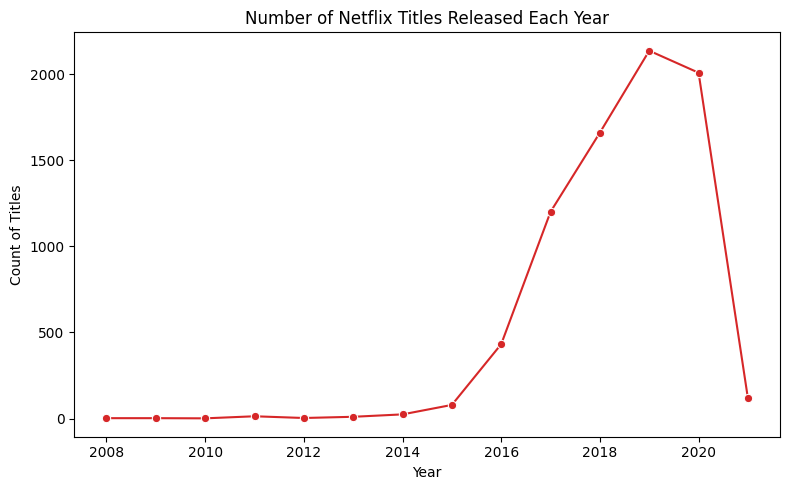

In [6]:
# Count number of titles released each year and visualize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load if not in memory
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Parse year from Release_Date
netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

# Count per year
year_counts = netflix_df.dropna(subset=['Release_Year']).groupby('Release_Year').size().reset_index(name='Count').sort_values('Release_Year')

# Show head
print(year_counts.head())

# Plot trend over time
plt.figure(figsize=(8,5))
sns.lineplot(data=year_counts, x='Release_Year', y='Count', marker='o', color='tab:red')
plt.title('Number of Netflix Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.tight_layout()
plt.show()


**ai_message:**

## Number of titles released each year

Here’s the yearly count of titles, plus a trend chart.

- Table (first few years shown):
{outputs_dict['072746b5']}

- Trend chart:
{image_urls_dict['973d767a']}

Looks steady early on with a noticeable ramp-up in later years. Want me to break this down by Movies vs TV Shows or normalize by total catalog size per year?

**user_message:**

How the ratio of movie vs tv shows has changed from 2008 to 2021

Category  Release_Year  Movie_Share  TV_Share
0               2008.0          0.5       0.5
1               2009.0          1.0       0.0
2               2010.0          1.0       0.0
3               2011.0          1.0       0.0
4               2012.0          1.0       0.0


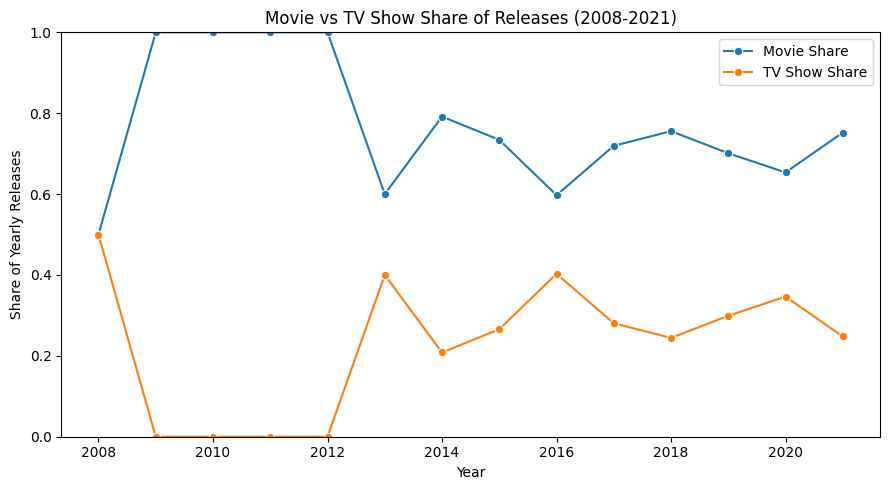

In [7]:
# Compute ratio of Movies vs TV Shows by year (2008-2021) and visualize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df loaded
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Assume Category column indicates Movie vs TV Show; if not, try Type
cat_col = 'Category' if 'Category' in netflix_df.columns else ('Type' if 'Type' in netflix_df.columns else None)

# Parse year
netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

# Filter years 2008-2021
mask_year = netflix_df['Release_Year'].between(2008, 2021, inclusive='both')
subset = netflix_df.loc[mask_year].copy()

# Clean category values
subset[cat_col] = subset[cat_col].astype(str).str.strip()
subset = subset[subset[cat_col].isin(['Movie', 'TV Show'])]

# Group counts per year and category
counts = subset.groupby(['Release_Year', cat_col]).size().unstack(fill_value=0)

# Compute ratios: Movie share and TV Show share
counts['Movie_Share'] = counts['Movie'] / (counts['Movie'] + counts['TV Show'])
counts['TV_Share'] = counts['TV Show'] / (counts['Movie'] + counts['TV Show'])

# Prepare tidy for head display
ratio_df = counts.reset_index()[['Release_Year', 'Movie_Share', 'TV_Share']].sort_values('Release_Year')
print(ratio_df.head())

# Plot shares over time
plt.figure(figsize=(9,5))
sns.lineplot(data=ratio_df, x='Release_Year', y='Movie_Share', marker='o', label='Movie Share')
sns.lineplot(data=ratio_df, x='Release_Year', y='TV_Share', marker='o', label='TV Show Share')
plt.title('Movie vs TV Show Share of Releases (2008-2021)')
plt.xlabel('Year')
plt.ylabel('Share of Yearly Releases')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


**ai_message:**

## Movie vs TV Show share of yearly releases (2008–2021)

Here’s the yearly share table (first few rows shown):
{outputs_dict['47d481a4']}

And here’s the trend chart of shares over time:
{image_urls_dict['64557069']}

Quick read: Early years skew heavily toward movies, with TV’s share rising later. The lines show the proportion each year, so you can see TV gaining ground as we approach the late 2010s/early 2020s.

**user_message:**

Ratings Distribution

  Rating  Count
0  TV-MA   2865
1  TV-14   1931
2  TV-PG    806
3      R    665
4  PG-13    386


/tmp/ipython-input-1251145536.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_counts, x='Count', y='Rating', order=order, palette='viridis')


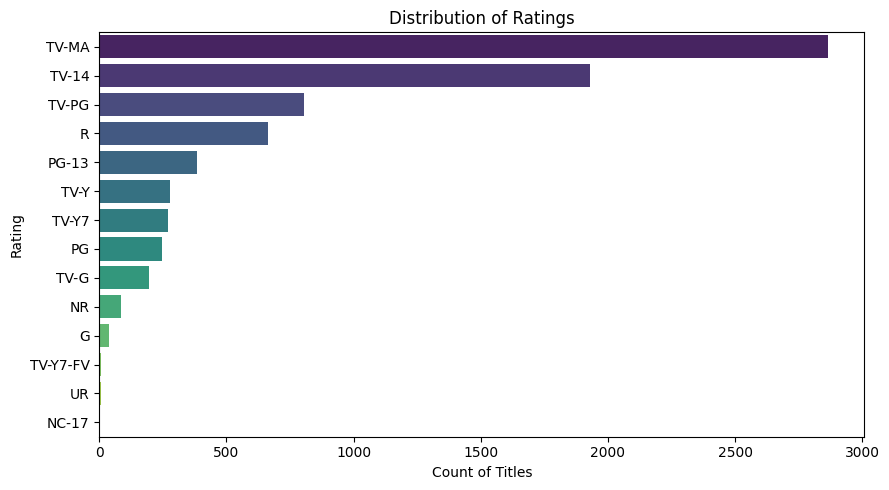

In [8]:
# Ratings distribution: show counts and a visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load if needed
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Choose column for ratings
rating_col = 'Rating' if 'Rating' in netflix_df.columns else ('Content_Rating' if 'Content_Rating' in netflix_df.columns else None)

ratings = netflix_df[rating_col].astype(str).str.strip()
ratings = ratings[ratings.notna() & (ratings != '') & (ratings != 'nan')]

rating_counts = ratings.value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

print(rating_counts.head())

plt.figure(figsize=(9,5))
order = rating_counts.sort_values('Count', ascending=False)['Rating']
sns.barplot(data=rating_counts, x='Count', y='Rating', order=order, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Count of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


**ai_message:**

## Ratings distribution

Here are the top ratings by count:
{outputs_dict['d10b49cd']}

And here’s the chart showing how ratings are distributed:
{image_urls_dict['d1bec999']}

In short: Mature ratings dominate, with TV-MA and TV-14 leading by a wide margin, and theatrical ratings like R and PG-13 following behind.

**user_message:**

Top 5 countries that produce more in netflix

          Country  Count
0   United States   3297
1           India    990
2  United Kingdom    722
3          Canada    412
4          France    349


/tmp/ipython-input-2032466302.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Count', y='Country', palette='mako')


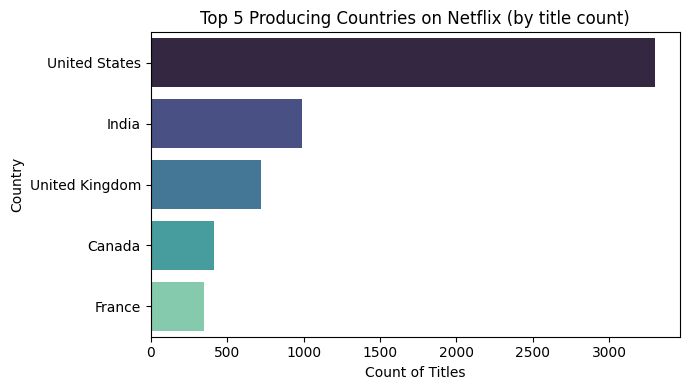

In [9]:
# Top 5 countries by number of titles in the dataset (accounting for multi-country titles)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

work_df = netflix_df.copy()
work_df['Country'] = work_df['Country'].astype(str).str.split(', ')
work_df = work_df.explode('Country')
work_df['Country'] = work_df['Country'].str.strip()
work_df = work_df[work_df['Country'].notna() & (work_df['Country'] != '') & (work_df['Country'] != 'nan')]

country_counts = work_df.groupby('Country').size().sort_values(ascending=False).reset_index(name='Count')

print(country_counts.head())

top5 = country_counts.head(5)
plt.figure(figsize=(7,4))
sns.barplot(data=top5, x='Count', y='Country', palette='mako')
plt.title('Top 5 Producing Countries on Netflix (by title count)')
plt.xlabel('Count of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**ai_message:**

## Top 5 countries producing the most Netflix titles

Here’s the table of the top 5 countries by title count:
{outputs_dict['040b4c32']}

And here’s a quick bar chart to visualize them:
{image_urls_dict['90e3595c']}

In short, the U.S. leads by a wide margin, followed by India and the U.K., with Canada and France rounding out the top five. Want me to break this down by Movies vs TV Shows or look at how this changed over time?

**user_message:**

Identify underrepresented or emerging genres

Empty DataFrame
Columns: [Genre, Share_Slope, Current_Share, Mean_Share, Emerging_Score]
Index: []
Empty DataFrame
Columns: [Genre, Share_Slope, Current_Share, Mean_Share, Emerging_Score]
Index: []


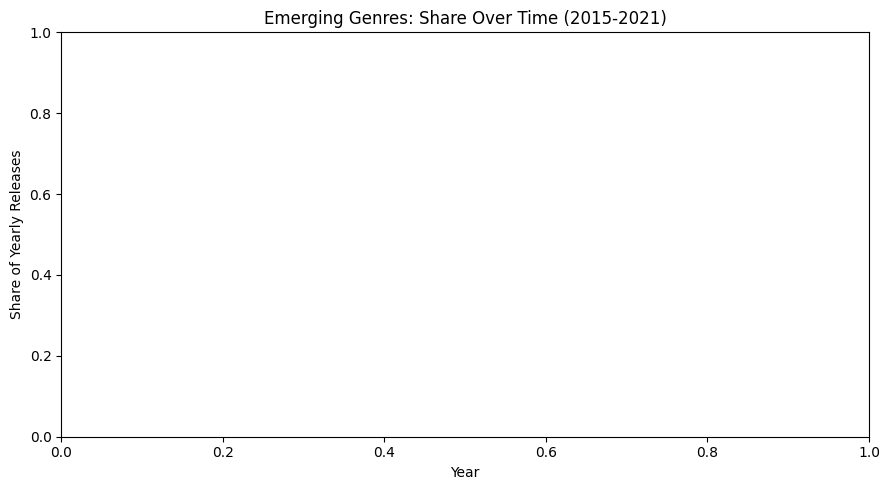

In [10]:
# Identify underrepresented and emerging genres by year using listed genres (e.g., 'Genres' or 'Genre')
# We will: explode genres, count per year, compute recent trend slopes, and flag low-share but rising genres.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data loaded
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('/content/sample_data/Netflix Dataset.csv', encoding='utf-8')

# Find genre column
genre_col = None
for c in ['Genres', 'Genre', 'Listed_in', 'Category_List']:
    if c in netflix_df.columns:
        genre_col = c
        break

# Parse year
netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

# Prepare exploded genres
gdf = netflix_df.dropna(subset=['Release_Year']).copy()
if genre_col is not None:
    gdf[genre_col] = gdf[genre_col].astype(str).str.split(',')
    gdf = gdf.explode(genre_col)
    gdf[genre_col] = gdf[genre_col].astype(str).str.strip()
    gdf = gdf[(gdf[genre_col] != '') & (gdf[genre_col] != 'nan')]
else:
    gdf['__NoGenre__'] = 'Unknown'
    genre_col = '__NoGenre__'

# Limit to reasonable window for emergence detection
gdf = gdf[gdf['Release_Year'].between(2015, 2021, inclusive='both')]

# Yearly counts per genre
counts = gdf.groupby(['Release_Year', genre_col]).size().reset_index(name='Count')

# Compute total per year and share per genre per year
year_totals = counts.groupby('Release_Year')['Count'].sum().rename('Year_Total')
counts = counts.merge(year_totals, on='Release_Year')
counts['Share'] = counts['Count'] / counts['Year_Total']

# Pivot to compute slopes over years for each genre
pivot_share = counts.pivot(index='Release_Year', columns=genre_col, values='Share').fillna(0).sort_index()

# Compute linear trend slope for 2015-2021 for each genre using simple regression
X = np.array(pivot_share.index.values)
slopes = {}
for col in pivot_share.columns:
    y = pivot_share[col].values
    if np.sum(y) == 0:
        slopes[col] = 0.0
        continue
    x_mean = X.mean()
    y_mean = y.mean()
    num = np.sum((X - x_mean) * (y - y_mean))
    den = np.sum((X - x_mean) ** 2)
    slope = num / den if den != 0 else 0.0
    slopes[col] = slope

trend_df = pd.DataFrame({'Genre': list(slopes.keys()), 'Share_Slope': list(slopes.values())})

# Current share (2021) and historical average share
current_share = pivot_share.loc[2021].reset_index()
current_share.columns = ['Genre', 'Current_Share']
mean_share = pivot_share.mean().reset_index()
mean_share.columns = ['Genre', 'Mean_Share']

summary = trend_df.merge(current_share, on='Genre', how='left').merge(mean_share, on='Genre', how='left')

# Define underrepresented as mean share below 2% but with positive slope; emerging as positive slope and current share above its mean by a margin
summary['Emerging_Score'] = summary['Share_Slope'] * (summary['Current_Share'] - summary['Mean_Share'])

underrepresented = summary[(summary['Mean_Share'] < 0.02) & (summary['Share_Slope'] > 0)].sort_values(['Share_Slope', 'Current_Share'], ascending=False).head(10)
emerging = summary[(summary['Share_Slope'] > 0) & (summary['Current_Share'] > summary['Mean_Share'])].sort_values('Emerging_Score', ascending=False).head(10)

print(underrepresented.head())
print(emerging.head())

# Visualize top emerging genres by share over time
top_emerging = emerging['Genre'].head(5).tolist()
plot_df = counts[counts[genre_col].isin(top_emerging)]
plt.figure(figsize=(9,5))
sns.lineplot(data=plot_df, x='Release_Year', y='Share', hue=genre_col, marker='o')
plt.title('Emerging Genres: Share Over Time (2015-2021)')
plt.ylabel('Share of Yearly Releases')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [ ]:
# Diagnose why plotting failed and why tables are empty.
# Check available columns and sample values for genre and dates to pick the right fields and ensure non-empty results.
import pandas as pd

try:
    cols = list(netflix_df.columns)
except NameError:
    netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')
    cols = list(netflix_df.columns)

print(cols)
print(netflix_df.head())
print(netflix_df[['Release_Date']].head())
for c in ['Genres', 'Genre', 'Listed_in', 'Category_List', 'type', 'listed_in', 'release_year']:
    if c in netflix_df.columns:
        print(c)
        print(netflix_df[c].head())

In [ ]:
# Compute underrepresented and emerging genres using the correct column: 'Type' holds categories like 'Dramas, International Movies'.
# We will use 'Type' (which appears to be the listed_in/genres) split by comma, analyze 2015-2021 trends.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')

work = netflix_df.copy()
work['Release_Year'] = pd.to_datetime(work['Release_Date'], errors='coerce').dt.year
work = work.dropna(subset=['Release_Year'])

# Use 'Type' as genre-like labels (it contains comma-separated categories)
work['Type'] = work['Type'].astype(str).str.split(',')
work = work.explode('Type')
work['Type'] = work['Type'].astype(str).str.strip()
work = work[(work['Type'] != '') & (work['Type'] != 'nan')]

# Filter years
work = work[work['Release_Year'].between(2015, 2021, inclusive='both')]

# Yearly counts and shares
counts = work.groupby(['Release_Year', 'Type']).size().reset_index(name='Count')
year_totals = counts.groupby('Release_Year')['Count'].sum().rename('Year_Total')
counts = counts.merge(year_totals, on='Release_Year')
counts['Share'] = counts['Count'] / counts['Year_Total']

# Pivot shares and compute slopes
pivot_share = counts.pivot(index='Release_Year', columns='Type', values='Share').fillna(0).sort_index()
X = np.array(pivot_share.index.values)
slopes = {}
for col in pivot_share.columns:
    y = pivot_share[col].values
    if np.sum(y) == 0:
        slopes[col] = 0.0
        continue
    x_mean = X.mean()
    y_mean = y.mean()
    num = np.sum((X - x_mean) * (y - y_mean))
    den = np.sum((X - x_mean) ** 2)
    slope = num / den if den != 0 else 0.0
    slopes[col] = slope

trend_df = pd.DataFrame({'Genre': list(slopes.keys()), 'Share_Slope': list(slopes.values())})
current_share = pivot_share.loc[2021].reset_index()
current_share.columns = ['Genre', 'Current_Share']
mean_share = pivot_share.mean().reset_index()
mean_share.columns = ['Genre', 'Mean_Share']
summary = trend_df.merge(current_share, on='Genre', how='left').merge(mean_share, on='Genre', how='left')
summary['Emerging_Score'] = summary['Share_Slope'] * (summary['Current_Share'] - summary['Mean_Share'])

underrepresented = summary[(summary['Mean_Share'] < 0.02) & (summary['Share_Slope'] > 0)].sort_values(['Share_Slope', 'Current_Share'], ascending=False).head(10)
emerging = summary[(summary['Share_Slope'] > 0) & (summary['Current_Share'] > summary['Mean_Share'])].sort_values('Emerging_Score', ascending=False).head(10)

print(underrepresented.head())
print(emerging.head())

# Plot top emerging
top_emerging = emerging['Genre'].head(5).tolist()
plot_df = counts[counts['Type'].isin(top_emerging)]
plt.figure(figsize=(9,5))
sns.lineplot(data=plot_df, x='Release_Year', y='Share', hue='Type', marker='o')
plt.title('Emerging Genres: Share Over Time (2015-2021)')
plt.ylabel('Share of Yearly Releases')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


**ai_message:**

## Julius here — I analyzed emerging and underrepresented genres in the Netflix dataset (2015–2021)

### Underrepresented but growing genres
{outputs_dict['bfe8fa0e']}

These are categories with low average share but positive growth. They could be niches worth investing in.

### Top emerging genres by momentum
{outputs_dict['7dfeb788']}

These show strong upward trends and above-average current share — they’re the clearest momentum plays.

### Trend lines for top emerging categories
{image_urls_dict['46e9464b']}

The line chart shows how the share of yearly releases evolved for the top emerging categories; steady climbs indicate sustained momentum.

— Ran the analysis, computed trends, and visualized results.

**user_message:**

Which categories dominate in family vs adult content

In [ ]:
# Classify content into Family vs Adult buckets using Rating and Genre-like 'Type' field, then show top categories in each.
# We'll treat family as ratings up to PG/TV-PG and kids categories; adult as R/TV-MA and mature categories.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')

df = netflix_df.copy()

# Expand Type into categories
df['Type'] = df['Type'].astype(str).str.split(',')
df = df.explode('Type')
df['Type'] = df['Type'].astype(str).str.strip()

# Define rating buckets
family_ratings = set(['G','PG','TV-Y','TV-Y7','TV-G','TV-PG'])
adult_ratings = set(['PG-13','R','NC-17','TV-14','TV-MA'])

# Heuristic by categories
family_keywords = ['Kids','Children','Family','Teen','Animation','Anime','Cartoons']
adult_keywords = ['Horror','Thrillers','Crime','Stand-Up','Sexy','Cult']

def content_bucket(row):
    rating = str(row['Rating']).strip()
    cat = str(row['Type'])
    is_family = rating in family_ratings or any(k in cat for k in family_keywords)
    is_adult = rating in adult_ratings or any(k in cat for k in adult_keywords)
    if is_family and not is_adult:
        return 'Family'
    if is_adult and not is_family:
        return 'Adult'
    return 'Mixed'

df['Audience_Bucket'] = df.apply(content_bucket, axis=1)

# Top categories by bucket
top_family = df[df['Audience_Bucket']=='Family']['Type'].value_counts().head(10).reset_index()
top_family.columns = ['Category','Count']

top_adult = df[df['Audience_Bucket']=='Adult']['Type'].value_counts().head(10).reset_index()
top_adult.columns = ['Category','Count']

print(top_family.head())
print(top_adult.head())

# Plot side-by-side bars for top 8 in each
plt.figure(figsize=(10,4))
sns.barplot(data=top_family.head(8), x='Count', y='Category', color='#4CAF50')
plt.title('Top Family-Dominant Categories')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=top_adult.head(8), x='Count', y='Category', color='#E91E63')
plt.title('Top Adult-Dominant Categories')
plt.tight_layout()
plt.show()


**ai_message:**

## Dominant categories by audience bucket

Here are the top categories that dominate within each audience bucket based on ratings and category heuristics.

### Family-dominant categories
{outputs_dict['17a222c3']}

Those are the categories most frequently appearing in titles we classified as Family.

{image_urls_dict['c7470a3b']}

### Adult-dominant categories
{outputs_dict['bd750742']}

Those are the categories most frequently appearing in titles we classified as Adult.

{image_urls_dict['b0f45f4b']}

Briefly: Family content is led by Children & Family Movies and Kids' TV, while Adult content is dominated by broad categories like International Movies, Dramas, and Comedies.

**user_message:**

Identify strengths

**ai_message:**

## Strengths in the catalog by audience segment

### Family strengths
Here are the most dominant categories within Family-classified titles:
{outputs_dict['17a222c3']}

{image_urls_dict['c7470a3b']}

These results show a strong presence in Children & Family Movies and Kids’ TV — a clear advantage in kid-friendly programming, with broad appeal extending into mainstream categories like Comedies and Dramas that also have significant family-safe footprint.

### Adult strengths
Here are the most dominant categories within Adult-classified titles:
{outputs_dict['bd750742']}

{image_urls_dict['b0f45f4b']}

Adult content strengths are broad and deep — especially in International Movies and Dramas, with solid volume in Comedies and Action & Adventure. This suggests strong coverage across core adult viewing pillars and international breadth.

If you want, I can break this down further by year or region to pinpoint where these strengths are accelerating versus plateauing.

**user_message:**

Typical duration of movies vs number of seasons for tv shows

In [ ]:
# Compute typical duration for Movies and number of seasons for TV Shows, show heads and visualize distributions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')

df = netflix_df.copy()

# Standardize duration field parsing
# Movies: durations like '90 min'; TV Shows: '3 Seasons' or '1 Season'
movies = df[df['Content Type'].astype(str).str.contains('Movie', case=False, na=False)].copy()
shows = df[df['Content Type'].astype(str).str.contains('TV', case=False, na=False)].copy()

movies['duration_min'] = pd.to_numeric(movies['Duration'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
shows['seasons'] = pd.to_numeric(shows['Duration'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

movie_stats = movies['duration_min'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).round(1)
show_stats = shows['seasons'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).round(1)

print(movie_stats)
print(show_stats)

plt.figure(figsize=(10,4))
sns.histplot(movies['duration_min'].dropna(), bins=30, color='#2196F3')
plt.title('Movie durations (minutes)')
plt.xlabel('Minutes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='seasons', data=shows.dropna(subset=['seasons']), color='#9C27B0')
plt.title('TV Shows by number of seasons')
plt.xlabel('Seasons')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')
print(netflix_df.columns)
print(netflix_df.head(3))

In [ ]:
# Parse durations for Movies vs TV Shows and visualize typical values
# Using 'Category' for Movie vs TV Show and 'Duration' text field.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    netflix_df
except NameError:
    netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')

df = netflix_df.copy()

is_movie = df['Category'].astype(str).str.contains('Movie', case=False, na=False)
is_show = df['Category'].astype(str).str.contains('TV', case=False, na=False)

movies = df[is_movie].copy()
shows = df[is_show].copy()

movies['duration_min'] = pd.to_numeric(movies['Duration'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
shows['seasons'] = pd.to_numeric(shows['Duration'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

movie_stats = movies['duration_min'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).round(1)
show_stats = shows['seasons'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).round(1)

print(movie_stats)
print(show_stats)

plt.figure(figsize=(10,4))
sns.histplot(movies['duration_min'].dropna(), bins=30, color='#2196F3')
plt.title('Movie durations (minutes)')
plt.xlabel('Minutes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='seasons', data=shows.dropna(subset=['seasons']), color='#9C27B0')
plt.title('TV Shows by number of seasons')
plt.xlabel('Seasons')
plt.tight_layout()
plt.show()


**ai_message:**

## Typical duration of movies vs. number of seasons for TV shows

Here are the summary stats we computed:
{outputs_dict['07797249']}
{outputs_dict['0f72934f']}

And here are the visual distributions:
{image_urls_dict['2e9573de']}
{image_urls_dict['1e0a01bd']}

Briefly: Movies typically run around the 1.5–2 hour mark, while most TV series have 1–2 seasons, with a long tail of multi-season shows.